In [1]:
#Load in all the necessary libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import nltk
import re

#stop words is used to remove words such as the, a, this etc.
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

#Stemming reduces words into there most basic form for example 'running ran run' the stem is run
from nltk.stem import PorterStemmer, WordNetLemmatizer

#Tokenize sentences/Words
from nltk.tokenize import sent_tokenize, word_tokenize

#Used for splitting the data into testing and training
from sklearn.model_selection import train_test_split

#using tfidfVectorizer for vectorizing our tweets
from sklearn.feature_extraction.text import TfidfVectorizer

#Using the logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\S00185812\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\S00185812\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\S00185812\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
#Read the data into a dataframe
df = pd.read_csv("Data/Twitter.csv")

#Examine the first couple of rows of the dataframe
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,assualt john,-1.0
3,what did just say vote for modi welcome bjp t...,1.0
4,asking his supporters prefix chowkidar their n...,1.0


In [3]:
#Renaming the columns to something more fitting and clean
df = df.rename(columns={'clean_text': 'tweet', 'category': 'sentiment'})

df.head()

,tweet,sentiment
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,assualt john,-1.0
3,what did just say vote for modi welcome bjp t...,1.0
4,asking his supporters prefix chowkidar their n...,1.0


In [4]:
#Drop empty rows
df = df.dropna()

#Get how many rows and cols are there in the dataframe
df.shape
#As we can see there are over 150,000 tweets in the database

(162974, 2)

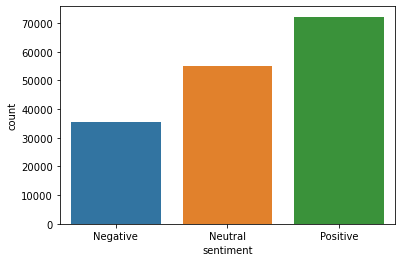

In [5]:
#Renaming the values of -1, 0, and 1 to Negative, Neutral and Positive to make more sense when im manipulating the list
df['sentiment'] = df['sentiment'].map({-1: 'Negative', 0: 'Neutral', 1: 'Positive'})  

#here we get a count of all the tweets that are in a certain group
sentimentPlot = sns.countplot(x = 'sentiment', data=df)

In [6]:
#store the english stop words
stopWords = stopwords.words('english')

#the tweet will be used for the input of our NLP model
tweets = df['tweet']

#function to take in a tweet clean it for processing and output it again
def cleanTweet(tweet):
    
    #convert tweet to lowercase
    tweet = tweet.lower()
    
    #removes any character not alphabetic or numeric
    tweet = re.sub(r"[^A-Za-z0-9]",' ', tweet)
    
    #tokenize the tweet
    token = word_tokenize(tweet)
    
    #remove the stop words and get the root of each word left over and return it to the list
    lm=WordNetLemmatizer()
    words = [lm.lemmatize(word) for word in token if word not in set(stopWords)]
    
    #return the tweet
    return ' '.join(words)

#for each tweet in the list clean it
tweets = tweets.apply(cleanTweet) 

df['tweet'] = tweets

df.head()

,tweet,sentiment
0,modi promised minimum government maximum gover...,Negative
1,talk nonsense continue drama vote modi,Neutral
2,assualt john,Negative
3,say vote modi welcome bjp told rahul main camp...,Positive
4,asking supporter prefix chowkidar name modi gr...,Positive


In [33]:
#function to split tweets
tweetWords = df.tweet.str.cat(sep=' ')

#token the tweets again
tokensTwo = word_tokenize(tweetWords)

#count number of words in database
print(len(tokensTwo))

#we then group up the same words together
tokenSets = set(tokensTwo)

#We can get the frequency distribution of these words
fd = nltk.FreqDist(tokensTwo)

#get the most commen 10
fd.tabulate(10)

2331784
    modi    india      bjp   people     like congress election narendra     vote     govt 
  155554    30992    14647    14416    12936    12927    11690    11466    10926    10025 


In [28]:
#Splitting my data into training and test data, with the test data being 10% of all tweets
X_train, X_test, y_train, y_test = train_test_split(
   df.tweet, df.sentiment, test_size=0.1, random_state=1)

In [29]:
#Creating a Logistic Regression model for our AI, and using TfidfVectorizer to speed up our code as it loops through the words and,
#processing them into numbers that can be read faster
model = Pipeline([('tfidf', TfidfVectorizer()), ('lgr', LogisticRegression())])

#I then fit my training data onto the model
model.fit(X_train, y_train)

#I then test the model by using my left over test data, and found that it had an accuracy of 88%
model.score(X_test, y_test)



C:\Users\S00185812\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8845257086759112

In [32]:
#Creating a function for predicting the sentiment of a tweet
def predict(tweet):
    tweet = tweet.lower()
    predictions = model.predict([tweet])
    
    #getting the prediction from the array
    prediction = predictions[0]
    return prediction

predict("I loved my fishing trip")


'Positive'